<a href="https://colab.research.google.com/github/Aaaron1995/ml_class2022/blob/main/class1027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster 流程

> 給予機器**無固定選項**、將資料分組的學習方式，稱做「Cluster」。

目標：產生一個有 *無固定選項* 的判斷模型\
流程：
1. 載入資料
2. 利用KMeans替每筆資料貼上標籤
3. 轉換為矩陣型態(array)以便切割、運算
4. 將模型的題目與標籤丟入決策樹演算法(DecisionTreeCluster)當中
5. 可視化決策樹
6. 判斷模型精準度
---

# 載入資料

In [54]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from sklearn.datasets import load_iris #載入範例模型
import pandas as pd

iris = load_iris()
db = pd.DataFrame(iris["data"], columns = iris["feature_names"]) #讀取資料為表格
db

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(db) #自己填答
db["labels"] = cluster.labels_
db

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#KMeans 未知K的狀況下
試過所有K，獲取最高信心程度\
[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)\
$平均親近程度a=\frac{1}{n}\displaystyle \sum^n_{j=1}{||P_i, 所在群_j||}\\
平均疏遠程度b=\frac{1}{n}\displaystyle \sum^n_{j=1}{||P_i, 非所在群_j||}$\
將所有點加總→
$親近程度a=\frac{1}{m}\displaystyle \sum^m_{i=1}\frac{1}{n}\sum^n_{j=1}{||P_i, 所在群_j||}\\
疏遠程度b=\frac{1}{m}\displaystyle \sum^m_{i=1}\frac{1}{n}\sum^n_{j=1}{||P_i, 非所在群_j||}$\
目標：min(a),max(b)
→$a*\frac{1}{b}$

$0 \leq Silhouette \ score = 1-\frac{a}{b} \leq 1$


,n_cluster,silhouette_score
0,2,0.681046
1,3,0.552819
2,4,0.498051
3,5,0.488749
4,6,0.364834
5,7,0.356332
6,8,0.357454
7,9,0.314378
8,10,0.321368
9,11,0.300221


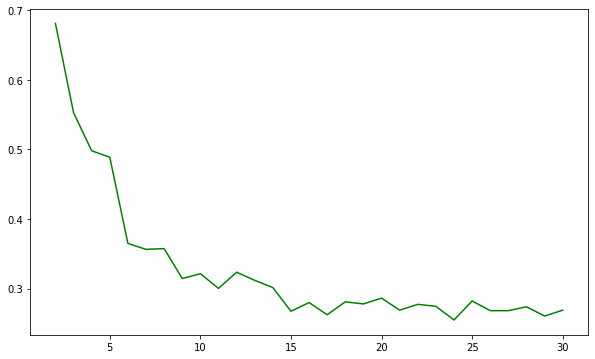

In [58]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

t_point = []
for t_k in range(2,31):
  t_cluster = KMeans(n_clusters = t_k)
  t_cluster.fit(iris["data"])
  t = silhouette_score(iris["data"], t_cluster.labels_)
  t_point.append([t_k, t])

plt.figure(figsize = (10, 6))
plt.plot(np.array(t_point)[:,0], np.array(t_point)[:,1], color = "green")
pd.DataFrame(t_point, columns=["n_cluster","silhouette_score"])

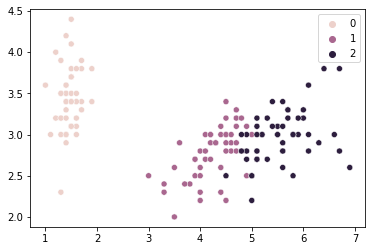

In [59]:
# 進行降維
# numpy array: 每一個軸分開做list操作  : 150筆都拿 0 第一個欄位
import seaborn as sns
sl = iris["data"][:, 2]
pl = iris["data"][:, 1]
sns.scatterplot(x=sl, y=pl, hue=iris["target"])

[Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

# 將資料轉為矩陣

- 資料處理Data.Frame &rarr; pandas
- sklearn: array &rarr; numpy

In [60]:
import numpy as np
from sklearn.model_selection import train_test_split

# drop為panda中的語法，可以對欄位進行切割
x = db.drop("labels", axis=1)
# DataFrame的資料轉化為array，利用train_test_split做矩陣切割
x = np.array(x)
y = np.array(db["labels"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(pd.DataFrame(x_train, columns = iris["feature_names"]),"\n")
print(pd.DataFrame(x_test, columns = iris["feature_names"]))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  4.8               3.4                1.6               0.2
1                  4.7               3.2                1.3               0.2
2                  5.5               2.4                3.8               1.1
3                  6.1               2.9                4.7               1.4
4                  5.7               2.6                3.5               1.0
..                 ...               ...                ...               ...
130                6.7               3.0                5.0               1.7
131                6.2               3.4                5.4               2.3
132                6.8               2.8                4.8               1.4
133                5.0               3.4                1.6               0.4
134                5.7               2.8                4.5               1.3

[135 rows x 4 columns] 

    sepal length (cm)  sepal width (cm

# 建構模型
>使用sklearn.tree中的[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [61]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=4)#調整最大深度
dec.fit(x_train, y_train)#將訓練資料丟進DecisionTreeClassifier裡

DecisionTreeClassifier(max_depth=4)

#可視化模型
>使用sklearn.tree中的[plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

[Text(0.4, 0.9, 'petal length (cm) <= 2.45\ngini = 0.653\nsamples = 135\nvalue = [45, 56, 34]\nclass = versicolor'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.6, 0.7, 'petal length (cm) <= 5.15\ngini = 0.47\nsamples = 90\nvalue = [0, 56, 34]\nclass = versicolor'),
 Text(0.4, 0.5, 'sepal length (cm) <= 6.45\ngini = 0.124\nsamples = 60\nvalue = [0, 56, 4]\nclass = versicolor'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0]\nclass = versicolor'),
 Text(0.6, 0.3, 'petal length (cm) <= 4.85\ngini = 0.48\nsamples = 10\nvalue = [0, 6, 4]\nclass = versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = versicolor'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = virginica'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = virginica')]

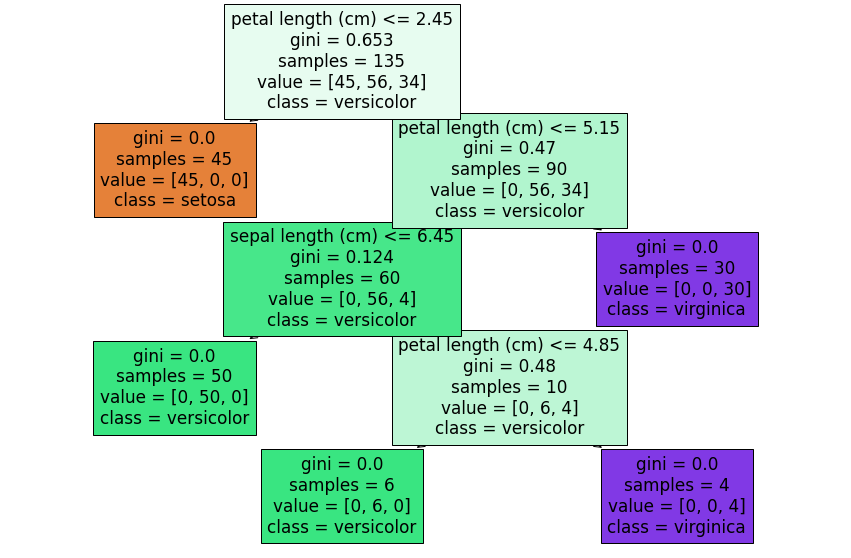

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 10))#設定圖框大小，置入決策圖
plot_tree(
    dec, 
    feature_names = iris["feature_names"], #將項目名稱放回框框中
    filled = True, #填入顏色
    class_names = iris["target_names"] #將答案丟進去
)

> 決策樹是**左T右F**


通過不同的決策將*gini吉尼係數*降至**最低** 

吉尼係數0.0=猜錯機率0%

$Gini = p_1(1-p_1)+p_2(1-p_2)+...+p_n(1-p_n)\\
=p_1-p_1^2+p_2-p_2^2+...+p_n-p_n^2=(p_1+p_2+...+p_n)-(p_1^2+p_2^2+...+p_n^2)\\
=1-\displaystyle\sum^{n}_{i=1}{p_i^2}$

---

#避免完美訓練 
又稱過擬合 **Overfitting** \\
將現實資料吃透，不斷訓練是沒有幫助的

&rarr; 前剪枝，設定條件

&rarr; 後剪枝

#測試模型精準度

In [63]:
#測試模型dec準確度
from sklearn.metrics import accuracy_score
#predict為預測()變數的答案
accuracy_score(y_test, dec.predict(x_test))
#accuracy準確性

1.0